<a href="https://colab.research.google.com/github/joseluisll/AnalisisIbex/blob/main/AnalisisIbex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala plotly en Colab
!pip install plotly

import numpy as np
import pandas as pd
import plotly.graph_objects as go

#Preparar la serie HISTORICA de IBEX35 desde 1/1/2015 A 11/04/2025

In [ ]:
# Abrir la serie de IBEX35
df_ibex = pd.read_csv('datos/datos_historicos_IBEX35.csv', parse_dates=['Fecha'], index_col='Fecha')

# Convert 'Último' column to float
df_ibex['Último'] = df_ibex['Último'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

# Method 1: Min-Max Scaling (Normalization to [0, 1])
df_ibex['Normalizado'] = (df_ibex['Último'] - df_ibex['Último'].min()) / (df_ibex['Último'].max() - df_ibex['Último'].min())


#Preparar la serie HISTORICA de Petroleo_WTI desde 1/1/2015 A 11/04/2025

In [ ]:
#datos históricos de petroleo_WTI y la normalizo
df_petroleo = pd.read_csv('datos/datos_historico_petroleo_wti.csv', parse_dates=['Fecha'], index_col='Fecha')

# Convert 'Último' column to float
df_petroleo['Último'] = df_petroleo['Último'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

# Min-Max Scaling
df_petroleo['Normalizado'] = (df_petroleo['Último'] - df_petroleo['Último'].min()) / (df_petroleo['Último'].max() - df_petroleo['Último'].min())


#REPRESENTAR LAS SERIES TEMPORALES NORMALIZADAS SOBRE EL MISMO EJE

El grafico es interactivo y permite hacer zoom.

El OJO humano y el cerebro ya ha visto que hay relación entre ambas series.

In [ ]:
# 1. Select 'Último' column from both DataFrames
ibex_ultimo = df_ibex['Normalizado']
petroleo_ultimo = df_petroleo['Normalizado']



# Crear DataFrame para Plotly
df_to_plot = pd.DataFrame({'IBEX35': ibex_ultimo, 'Petroleo_WTI': petroleo_ultimo})


## Assuming df_ibex and df_petroleo are already defined and loaded
min_len = min(len(df_ibex), len(df_petroleo))

# Create the date range
date_range = pd.date_range(start='2015-01-01', periods=min_len, freq='D')

# Truncate df_to_plot to the minimum length
df_to_plot = df_to_plot.iloc[:min_len]

# Assign the date range as the index to df_to_plot
df_to_plot.index = date_range

# Crear gráfico interactivo
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_to_plot.index, y=df_to_plot['IBEX35'],
                         mode='lines', name='IBEX35'))

fig.add_trace(go.Scatter(x=df_to_plot.index, y=df_to_plot['Petroleo_WTI'],
                         mode='lines', name='Petroleo_WTI'))

# Actualizar diseño del gráfico
fig.update_layout(title='IBEX35 vs Petroleo_WTI',
                  xaxis_title='Fecha',
                  yaxis_title='Valor',
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


Yo concluiría que el índice de petroleo_WTI puede ser un indice adelantado del IBEX 35.

¿Cómo puedo calcular el tiempo de adelanto?
¿Habrá un factor de correlación?
¿Esto se podría hacer con un modelo?.
Problemas con los ejes, tienen diferente longitud, hay que ajustar siempre al eje con la misma longitud.

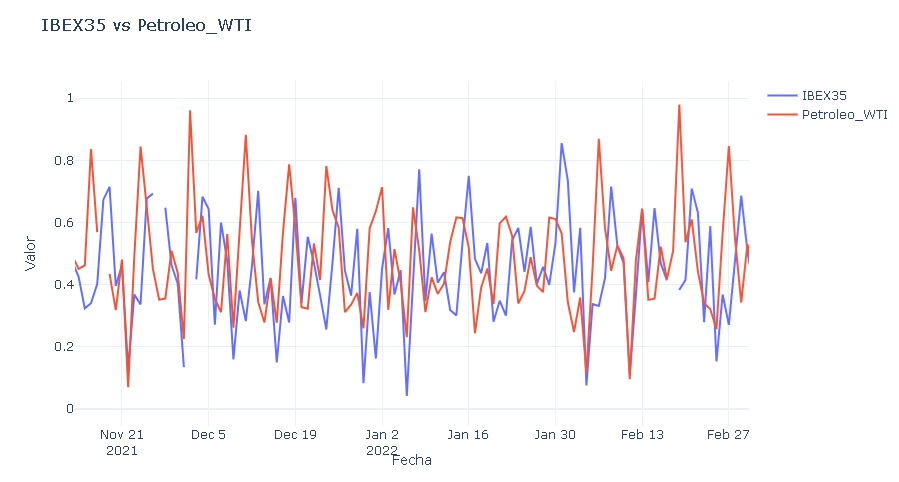

In [ ]:
# Assuming df_to_plot is already defined and contains your data

# Set the window size for the rolling correlation
window_size = 30  # You can adjust this to your needs

# Calculate the rolling correlation
rolling_correlation = df_to_plot['IBEX35'].rolling(window=window_size).corr(df_to_plot['Petroleo_WTI'])

# Create a new DataFrame for the rolling correlation
df_correlation = pd.DataFrame({'Correlation': rolling_correlation})
df_correlation = df_correlation.reindex(df_to_plot.index, method='pad')

# You can now plot or analyze df_correlation

In [ ]:
# Add trace for the correlation
fig.add_trace(go.Scatter(x=df_correlation.index, y=df_correlation['Correlation'],
                         mode='lines', name='Correlation', yaxis='y2'))

# Update layout for the second y-axis
fig.update_layout(
    yaxis2=dict(
        title='Correlation',
        overlaying='y',
        side='right',
        range=[-1, 1]  # Set range for correlation
    ),
    title='IBEX35, Petroleo_WTI, and Correlation',
    xaxis_title='Fecha',
    yaxis_title='Valor',
    hovermode='x unified',
    template='plotly_white'
)

# Show the plot

Añado la correlación: 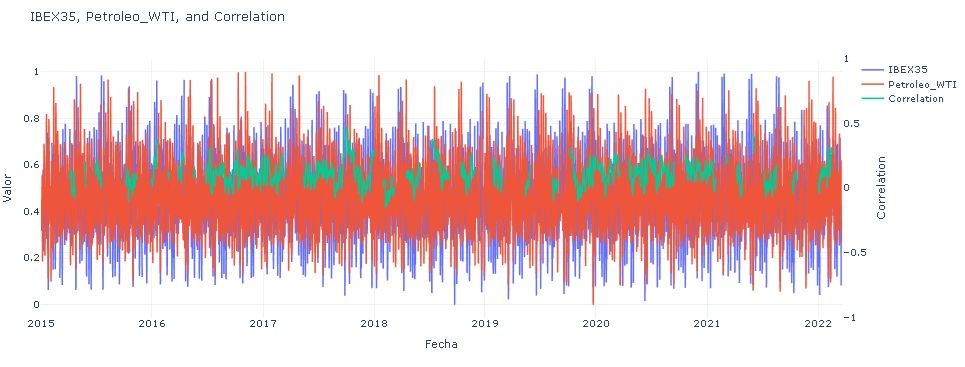

In [ ]:
# Assuming df_to_plot is already defined

# Calculate the cross-correlation
cross_corr = np.correlate(df_to_plot['IBEX35'], df_to_plot['Petroleo_WTI'], mode='full')

# Find the lag with the maximum correlation
lags = np.arange(-len(df_to_plot) + 1, len(df_to_plot))
lag_max = lags[np.argmax(cross_corr)]

print(f"Estimated temporal lead of Petroleo_WTI over IBEX35: {lag_max} days")

Estimated temporal lead of Petroleo_WTI over IBEX35: -2635 days
